In [1]:
import os
from PIL import Image
import torch
import torch.optim as optim
import torch.nn as nn
from torchvision import transforms
import matplotlib.pyplot as plt

import preprocess as p
import display as  disp
import numpy as np



In [4]:
!pip install matplotlib
#python3 -m pip install --upgrade pip  en la terminal

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


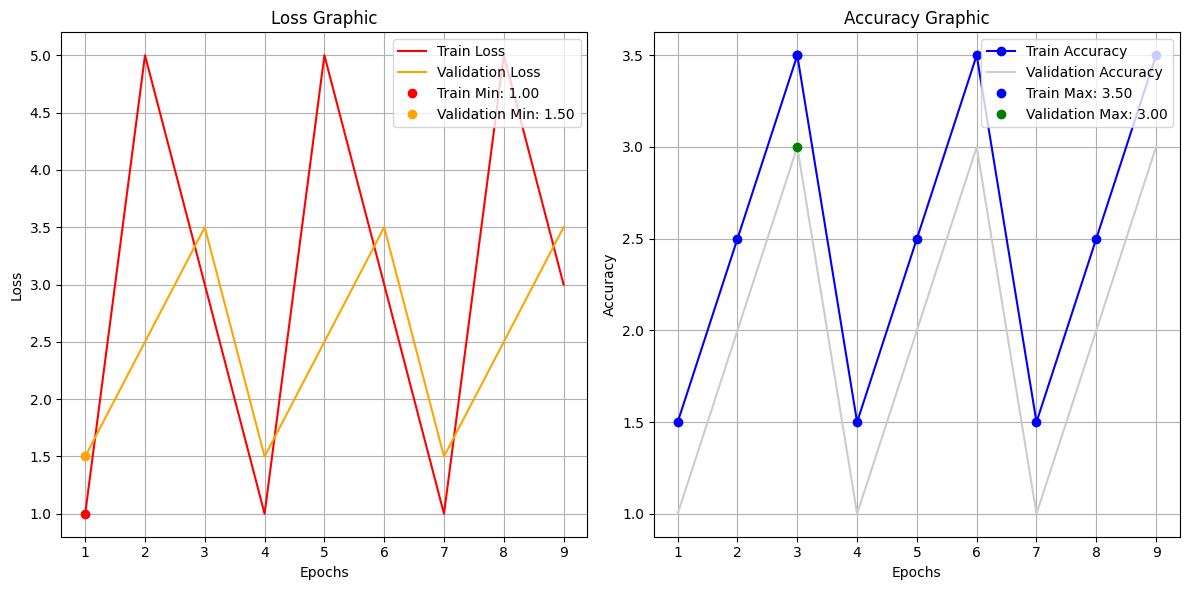

In [2]:
#Prueba de visualización de gráficas
epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9]
train_loss_values = [1, 5, 3, 1, 5, 3, 1, 5, 3]
train_acc_values= [1.5, 2.5, 3.5, 1.5, 2.5, 3.5, 1.5, 2.5, 3.5]
val_loss_values = [1.5, 2.5, 3.5, 1.5, 2.5, 3.5, 1.5, 2.5, 3.5]
val_acc_values = [1, 2, 3, 1, 2, 3, 1, 2, 3]

num_epochs = len(epochs) +1
# Crear la figura y los ejes
plt.figure(figsize=(12, 6))

# Gráfica del Loss
plt.subplot(1, 2, 1) 
plt.plot(epochs, train_loss_values, color='red', label='Train Loss')
plt.plot(epochs, val_loss_values, color='orange', label='Validation Loss')
# Encontrar el mínimo para train y validation
train_min_idx = train_loss_values.index(min(train_loss_values))
val_min_idx = val_loss_values.index(min(val_loss_values))
#Marcar los mínimos
plt.plot(epochs[train_min_idx], train_loss_values[train_min_idx], 'ro', label=f'Train Min: {train_loss_values[train_min_idx]:.2f}')
plt.plot(epochs[val_min_idx], val_loss_values[val_min_idx], 'o', color='orange', label=f'Validation Min: {val_loss_values[val_min_idx]:.2f}')
plt.title('Loss Graphic')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
ticks = np.arange(1, num_epochs, 1)
plt.xticks(ticks, [int(x) for x in ticks]) # Formato a enteros
plt.tight_layout()

# Gráfica del Accuracy
plt.subplot(1, 2, 2)  
plt.plot(epochs, train_acc_values, marker = 'o', color='blue', label='Train Accuracy')
plt.plot(epochs, val_acc_values, color='0.8', label='Validation Accuracy')
# Encontrar el máximo para train y validation
train_max_idx = train_acc_values.index(max(train_acc_values))
val_max_idx = val_acc_values.index(max(val_acc_values))
#Marcar los mínimos
plt.plot(epochs[train_max_idx], train_acc_values[train_max_idx], 'bo', label=f'Train Max: {train_acc_values[train_max_idx]:.2f}')
plt.plot(epochs[val_max_idx], val_acc_values[val_max_idx], 'go', label=f'Validation Max: {val_acc_values[val_max_idx]:.2f}')
plt.title('Accuracy Graphic')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
ticks = np.arange(1, num_epochs, 1)
plt.xticks(ticks, [int(x) for x in ticks]) # Formato a enteros
plt.tight_layout()
    

In [2]:
arch = "3C"
lr = 0.001
da = "NO"

name = f"{arch}_{lr}_{da}"
print(f"{name}")

3C_0.001_NO


In [3]:
name = disp.crear_nombre_modelo(arch, lr, da)
print(f"{name}")

1_3C_2_NO


In [6]:
save = False
print(f"{save}")

False


In [7]:
print("[VALIDACIÓN]")
if save == True:
    print("Epoch [{epoch+1}/{num_epochs}] - Loss: {val_epoch_loss:.4f}, Accuracy: {val_epoch_accuracy:.2f}% - Best")
else:
    print("Epoch [{epoch+1}/{num_epochs}] - Loss: {val_epoch_loss:.4f}, Accuracy: {val_epoch_accuracy:.2f}%")
        
save = False 

[VALIDACIÓN]
Epoch [{epoch+1}/{num_epochs}] - Loss: {val_epoch_loss:.4f}, Accuracy: {val_epoch_accuracy:.2f}%


In [1]:
model_paths = [("Model1_3C_1_DA.pth", "3C"), ("Model1_3C_1_NO.pth", "3C")]

for model_path, model_class in model_paths:
    print(f"Modelo: {model_class}, Ruta: {model_path}")

Modelo: 3C, Ruta: Model1_3C_1_DA.pth
Modelo: 3C, Ruta: Model1_3C_1_NO.pth


In [4]:
model_path = "Resultado/Models/Model1_3C_1_NO.pth"
model_name = os.path.basename(model_path)
print(f"{model_name}")

Model1_3C_1_NO.pth


In [ ]:
#TERRENO DE TEST PARA COMPROBAR EL FUNCIONAMIENTO DE ROC_AUC_SCORE

import numpy as np

def manual_roc_auc_score(y_true, y_scores):
    # Ordenar los valores por las puntuaciones de probabilidad descendente
    sorted_indices = np.argsort(y_scores)[::-1]
    y_true = np.array(y_true)[sorted_indices]
    
    # Contar positivos y negativos
    P = np.sum(y_true == 1)
    N = np.sum(y_true == 0)
    
    if P == 0 or N == 0:
        return 0.0  # Si hay solo una clase, AUC no es válido
    
    # Calcular TPR y FPR acumulativos
    tpr = np.cumsum(y_true) / P
    fpr = np.cumsum(1 - y_true) / N
    
    
    print(f"TPR_INTEGRAR: {tpr}")
    print(f"FPR_INTEGRAR: {fpr}")
    
    # Integrar usando la regla del trapecio
    auc = np.trapz(tpr, fpr)
    
    return auc

from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

#Etiquetas verdaderas
all_labels = [0, 1, 0, 1, 0, 1, 1, 1, 1, 1]
#Probabilidades predichas
#all_probs = [1.8390972e-32, 0.01, 1.8390972e-32, 0.2, 1.8390972e-32, 0.1, 0.02, 0.1, 0.1, 0.1]
all_probs = [0.001, 0.3, 0.0001, 0.2, 0.1, 0.15, 0.2, 0.1, 0.01, 0.15]
all_preds = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

acc = accuracy_score(all_labels, all_preds)
auc = roc_auc_score(all_labels, all_probs)
auc_manual = manual_roc_auc_score(all_labels, all_probs)
cm = confusion_matrix(all_labels, all_preds)#Calculamos la matriz de confusión
tn, fp, fn, tp = cm.ravel()
tpr = tp / (tp + fn)  #Calculamos el True Positive Rate / Sensitivity (Recall)
fpr = fp / (fp + tn)  #Calculamos el False Positive Rate

print(f"ACC: {acc}")
print(f"AUC: {auc}")
print(f"TPR: {tpr}")
print(f"FPR: {fpr}")
print(f"AUC_MANUAL:{auc_manual}")

In [4]:
import numpy as np

In [6]:
probabilidades = np.array([0.2,0.8,0,4])



predicciones = (probabilidades > 0.5)

In [7]:
predicciones

array([False,  True, False,  True])

In [1]:
data_dir = './dataset/test'
batch_size = 32
img_size = 64

#Architecture
out_1 = 64 
out_2 = 128 
out_3 = 256 
out_4 = 512

Tamaño Positivo: 10000, Media Positiva: 0.9839911101665347, Std Positiva: 0.021372346145892507
Tamaño Negativo: 10000, Media Negativa: 0.9184341435816846, Std Negativa: 0.12229510109668185
Min prob: [2.7770418e-05] Max prob: [0.99983716]
Unique labels: {0, 1}
El archivo ./Test/MatrixTest_Model1_B3C_3_NO.pth.svg ya existe, no se sobrescribirá.
Resultados guardados en Test/Resultados_test_Acumulados.csv
Resultados para Resultados/Models/Model1_B3C_3_NO.pth: {'ACC': 0.5104, 'AUC': 0.8557794799999999, 'TPR': 0.9996, 'FPR': 0.9788} con umbral de 0.5


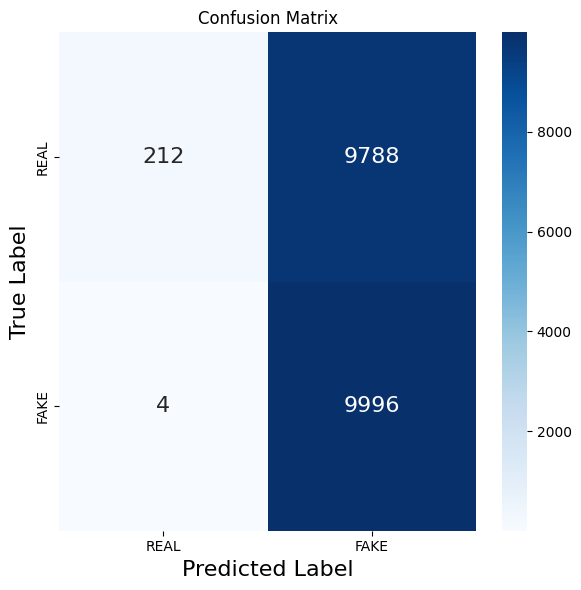

In [12]:
test_loader = p.get_test_loader(data_dir, batch_size=batch_size, img_size=img_size)

models = [("Resultados/Models/Model1_B3C_3_NO.pth", "B3C")]
#Elegimos dispositivo (Como es test se puede hacer en cpu)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
for model_path, model_class in models:
    #Creamos el modelo con la arquitectura correspondiente dependiendo del modelo a testear 
    model = t.load_model(model_path, model_class, out_1, out_2, out_3, out_4, img_size)
    #Obtenemos las métricas y la matriz de confusión y las guardamos
    metrics = t.evaluate_model_prueba(model, test_loader, device, model_path)
    print(f"Resultados para {model_path}: {metrics} con umbral de 0.5")

In [8]:
import torch
import testt as t
import preprocess as p